In [ ]:
import pandas as pd

# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Ruta del archivo en Google Drive
ruta_archivo = '/content/gdrive/My Drive/DATA_SET_EVMC_V2.csv'

for fn in uploaded.keys():
    print('Archivo cargado: "{name}" con tamaño {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Cargar el dataset con Pandas
#df = pd.read_csv(ruta_archivo)

# Leer el archivo de datos y organizar como un arreglo Numpy
df = pd.read_csv(ruta_archivo, sep=";", index_col=False, encoding='latin1')                                   # Lectura del archivo CSV cargado anteriormente
df = df.replace(',', '.', regex=True)                                                                         # Para evitar problemas en la lectura de los numeros decimales que vienen separados con ",", se hace un reemplazo a puntos"."
df.columns = ["RATA DE MOLIENDA (m3/h)", "FLUJO DE JUGO CLARO (m3/h)", "TEMPERATURA DE JUGO CLARO (°C)",
              "PRESION PSIG CALANDRIA 1","% APERTURA VALVULA VAPOR CALANDRIA 1","FLUJO VAPOR EVAPORACION",
              "FLUJO VAPOR VIVO TOTAL","FLUJO VAPOR CONDENSACION","EXCESO VAPOR"]                             # Nombrar las columnas del archivo


print("Tamaño del conjunto de datos:",df.shape)# Imprimir parte de los datos den data_frame
display(df)




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archivo cargado: "DATA SET EVMC_V2 (1).csv" con tamaño 6381 bytes
Tamaño del conjunto de datos: (150, 9)


,RATA DE MOLIENDA (m3/h),FLUJO DE JUGO CLARO (m3/h),TEMPERATURA DE JUGO CLARO (°C),PRESION PSIG CALANDRIA 1,% APERTURA VALVULA VAPOR CALANDRIA 1,FLUJO VAPOR EVAPORACION,FLUJO VAPOR VIVO TOTAL,FLUJO VAPOR CONDENSACION,EXCESO VAPOR
0,220,218,108.0,16.54,94.47,231.74,320.0,88,0.
1,228,240,106.0,17.17,67.76,278.41,325.0,47,1.
2,184,267,107.0,18.5,51.85,217.76,310.0,92,1.
3,202,227,105.0,18.51,67.29,217.76,310.0,92,0.
4,193,239,109.0,18.52,67.4,235.52,294.0,58,1.
...,...,...,...,...,...,...,...,...,...
145,183,217,112.0,17.96,NaN,204.61,302.0,97.39,0.
146,197,246,110.0,18.21,46.49,220.98,307.0,86.02,0
147,190,268,90.0,18.83,64.72,223.6,311.0,87.4,1
148,188,215,110.0,18.84,66.47,214.43,306.0,91.57,0


In [ ]:
# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RATA DE MOLIENDA (m3/h)               148 non-null    object 
 1   FLUJO DE JUGO CLARO (m3/h)            149 non-null    object 
 2   TEMPERATURA DE JUGO CLARO (°C)        146 non-null    float64
 3   PRESION PSIG CALANDRIA 1              149 non-null    object 
 4   % APERTURA VALVULA VAPOR CALANDRIA 1  149 non-null    object 
 5   FLUJO VAPOR EVAPORACION               148 non-null    object 
 6   FLUJO VAPOR VIVO TOTAL                148 non-null    float64
 7   FLUJO VAPOR CONDENSACION              149 non-null    object 
 8   EXCESO VAPOR                          149 non-null    object 
dtypes: float64(2), object(7)
memory usage: 10.7+ KB
None
       TEMPERATURA DE JUGO CLARO (°C)  FLUJO VAPOR VIVO TOTAL
count                      146.000000  

In [ ]:
# Contar valores nulos por columna
df.isnull().sum()

RATA DE MOLIENDA (m3/h)                 2
FLUJO DE JUGO CLARO (m3/h)              1
TEMPERATURA DE JUGO CLARO (°C)          4
PRESION PSIG CALANDRIA 1                1
% APERTURA VALVULA VAPOR CALANDRIA 1    1
FLUJO VAPOR EVAPORACION                 2
FLUJO VAPOR VIVO TOTAL                  2
FLUJO VAPOR CONDENSACION                1
EXCESO VAPOR                            1
dtype: int64

In [ ]:
# Eliminar filas que contienen valores nulos
df = df[~df.isnull().any(axis=1)]

# Eliminar filas que contienen valores blancos
df = df[~df.eq('').any(axis=1)]

# Contar valores nulos por columna
df.isnull().sum()

RATA DE MOLIENDA (m3/h)                 0
FLUJO DE JUGO CLARO (m3/h)              0
TEMPERATURA DE JUGO CLARO (°C)          0
PRESION PSIG CALANDRIA 1                0
% APERTURA VALVULA VAPOR CALANDRIA 1    0
FLUJO VAPOR EVAPORACION                 0
FLUJO VAPOR VIVO TOTAL                  0
FLUJO VAPOR CONDENSACION                0
EXCESO VAPOR                            0
dtype: int64

In [ ]:
# Reemplazar valores string por float
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('si.', 1)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('SI.', 1)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('1..', 1)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('SI ES', 1)
# Reemplazar valores string por float
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('no.', 0)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('0..', 0)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('no aplica.', 0)
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].replace('NO', 0)
# Reemplazar valores string por float usando expresiones regulares
#df['Columna'] = df['Columna'].str.replace('[a-z]', 1.0)


In [ ]:
df['RATA DE MOLIENDA (m3/h)'] = df['RATA DE MOLIENDA (m3/h)'].astype('float64')
df['FLUJO DE JUGO CLARO (m3/h)'] = df['FLUJO DE JUGO CLARO (m3/h)'].astype('float64')
df['PRESION PSIG CALANDRIA 1'] = df['PRESION PSIG CALANDRIA 1'].astype('float64')
df['% APERTURA VALVULA VAPOR CALANDRIA 1'] = df['% APERTURA VALVULA VAPOR CALANDRIA 1'].astype('float64')
df['FLUJO VAPOR EVAPORACION'] = df['FLUJO VAPOR EVAPORACION'].astype('float64')
df['FLUJO VAPOR CONDENSACION'] = df['FLUJO VAPOR CONDENSACION'].astype('float64')
df['EXCESO VAPOR'] = df['EXCESO VAPOR'].astype('float64')

# Información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RATA DE MOLIENDA (m3/h)               139 non-null    float64
 1   FLUJO DE JUGO CLARO (m3/h)            139 non-null    float64
 2   TEMPERATURA DE JUGO CLARO (°C)        139 non-null    float64
 3   PRESION PSIG CALANDRIA 1              139 non-null    float64
 4   % APERTURA VALVULA VAPOR CALANDRIA 1  139 non-null    float64
 5   FLUJO VAPOR EVAPORACION               139 non-null    float64
 6   FLUJO VAPOR VIVO TOTAL                139 non-null    float64
 7   FLUJO VAPOR CONDENSACION              139 non-null    float64
 8   EXCESO VAPOR                          139 non-null    float64
dtypes: float64(9)
memory usage: 10.9 KB
None


In [ ]:
# Estadísticas descriptivas
print(df.describe())

       RATA DE MOLIENDA (m3/h)  FLUJO DE JUGO CLARO (m3/h)  \
count               139.000000                  139.000000   
mean                206.625899                  249.625899   
std                  15.434891                   24.605370   
min                 180.000000                  181.000000   
25%                 193.000000                  233.000000   
50%                 207.000000                  249.000000   
75%                 220.500000                  269.500000   
max                 230.000000                  290.000000   

       TEMPERATURA DE JUGO CLARO (°C)  PRESION PSIG CALANDRIA 1  \
count                      139.000000                139.000000   
mean                       107.776978                 18.303237   
std                          3.778358                  1.199748   
min                         90.000000                 13.910000   
25%                        106.000000                 17.635000   
50%                        108.000000  

<Axes: >

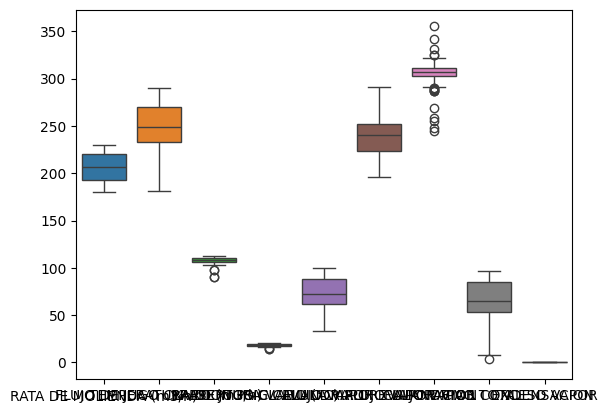

In [ ]:
import seaborn as sns

sns.boxplot(data=df)

Text(0, 0.5, 'Valor')

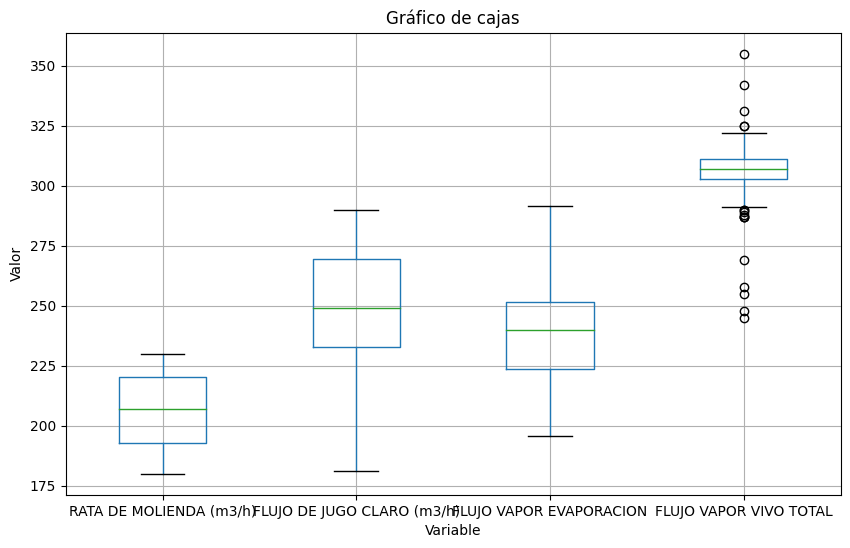

In [ ]:
df.boxplot(column=['RATA DE MOLIENDA (m3/h)', 'FLUJO DE JUGO CLARO (m3/h)','FLUJO VAPOR EVAPORACION','FLUJO VAPOR VIVO TOTAL'], figsize=(10, 6))
plt.title('Gráfico de cajas')
plt.xlabel('Variable')
plt.ylabel('Valor')


Text(0, 0.5, 'Valor')

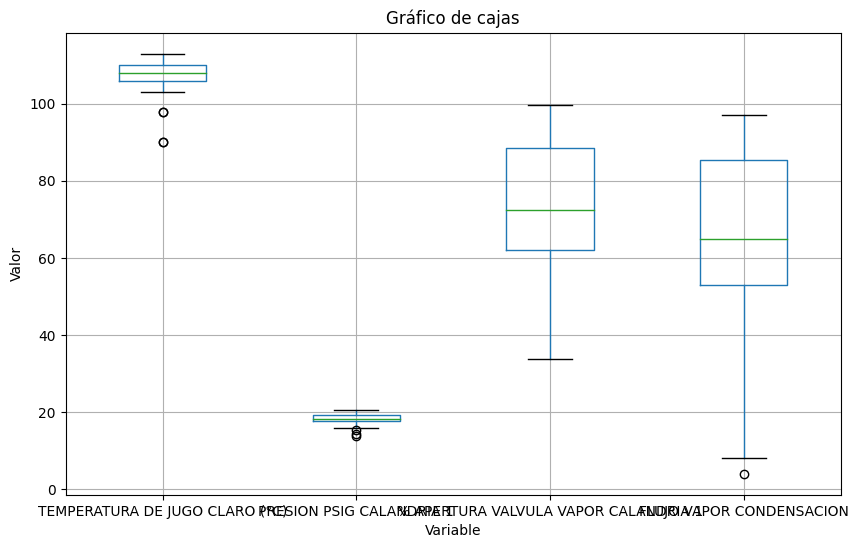

In [ ]:
df.boxplot(column=['TEMPERATURA DE JUGO CLARO (°C)', 'PRESION PSIG CALANDRIA 1','% APERTURA VALVULA VAPOR CALANDRIA 1','FLUJO VAPOR CONDENSACION'], figsize=(10, 6))
plt.title('Gráfico de cajas')
plt.xlabel('Variable')
plt.ylabel('Valor')

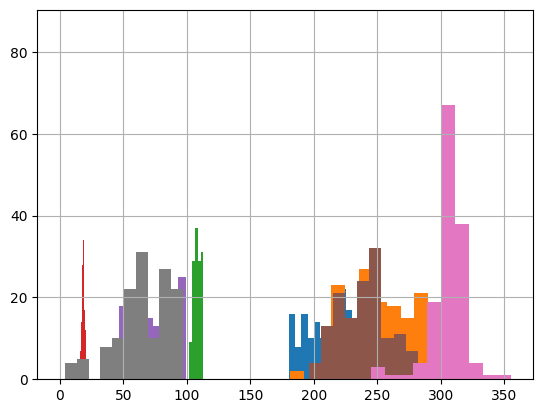

In [ ]:
import seaborn as sns

# Distribución de las variables numéricas
for col in df.select_dtypes(include=['number']):
    df[col].hist()

<ipython-input-136-6391c441af10>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


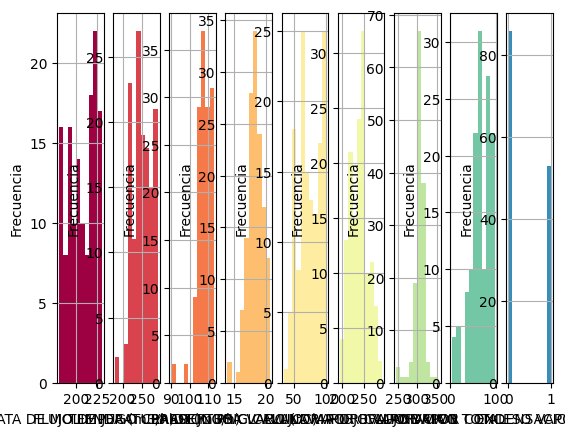

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Generar un subplot para cada variable numérica
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    df[col].hist(color=plt.cm.Spectral(i/len(numeric_cols)))
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el tamaño de la figura y mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Correlaciones entre las variables
corr = df.corr()
print(corr)

                                      RATA DE MOLIENDA (m3/h)  \
RATA DE MOLIENDA (m3/h)                              1.000000   
FLUJO DE JUGO CLARO (m3/h)                           0.133039   
TEMPERATURA DE JUGO CLARO (°C)                       0.053977   
PRESION PSIG CALANDRIA 1                            -0.086732   
% APERTURA VALVULA VAPOR CALANDRIA 1                 0.142900   
FLUJO VAPOR EVAPORACION                              0.631280   
FLUJO VAPOR VIVO TOTAL                               0.014932   
FLUJO VAPOR CONDENSACION                            -0.573230   
EXCESO VAPOR                                        -0.398895   

                                      FLUJO DE JUGO CLARO (m3/h)  \
RATA DE MOLIENDA (m3/h)                                 0.133039   
FLUJO DE JUGO CLARO (m3/h)                              1.000000   
TEMPERATURA DE JUGO CLARO (°C)                          0.081640   
PRESION PSIG CALANDRIA 1                               -0.077439   
% APERTUR

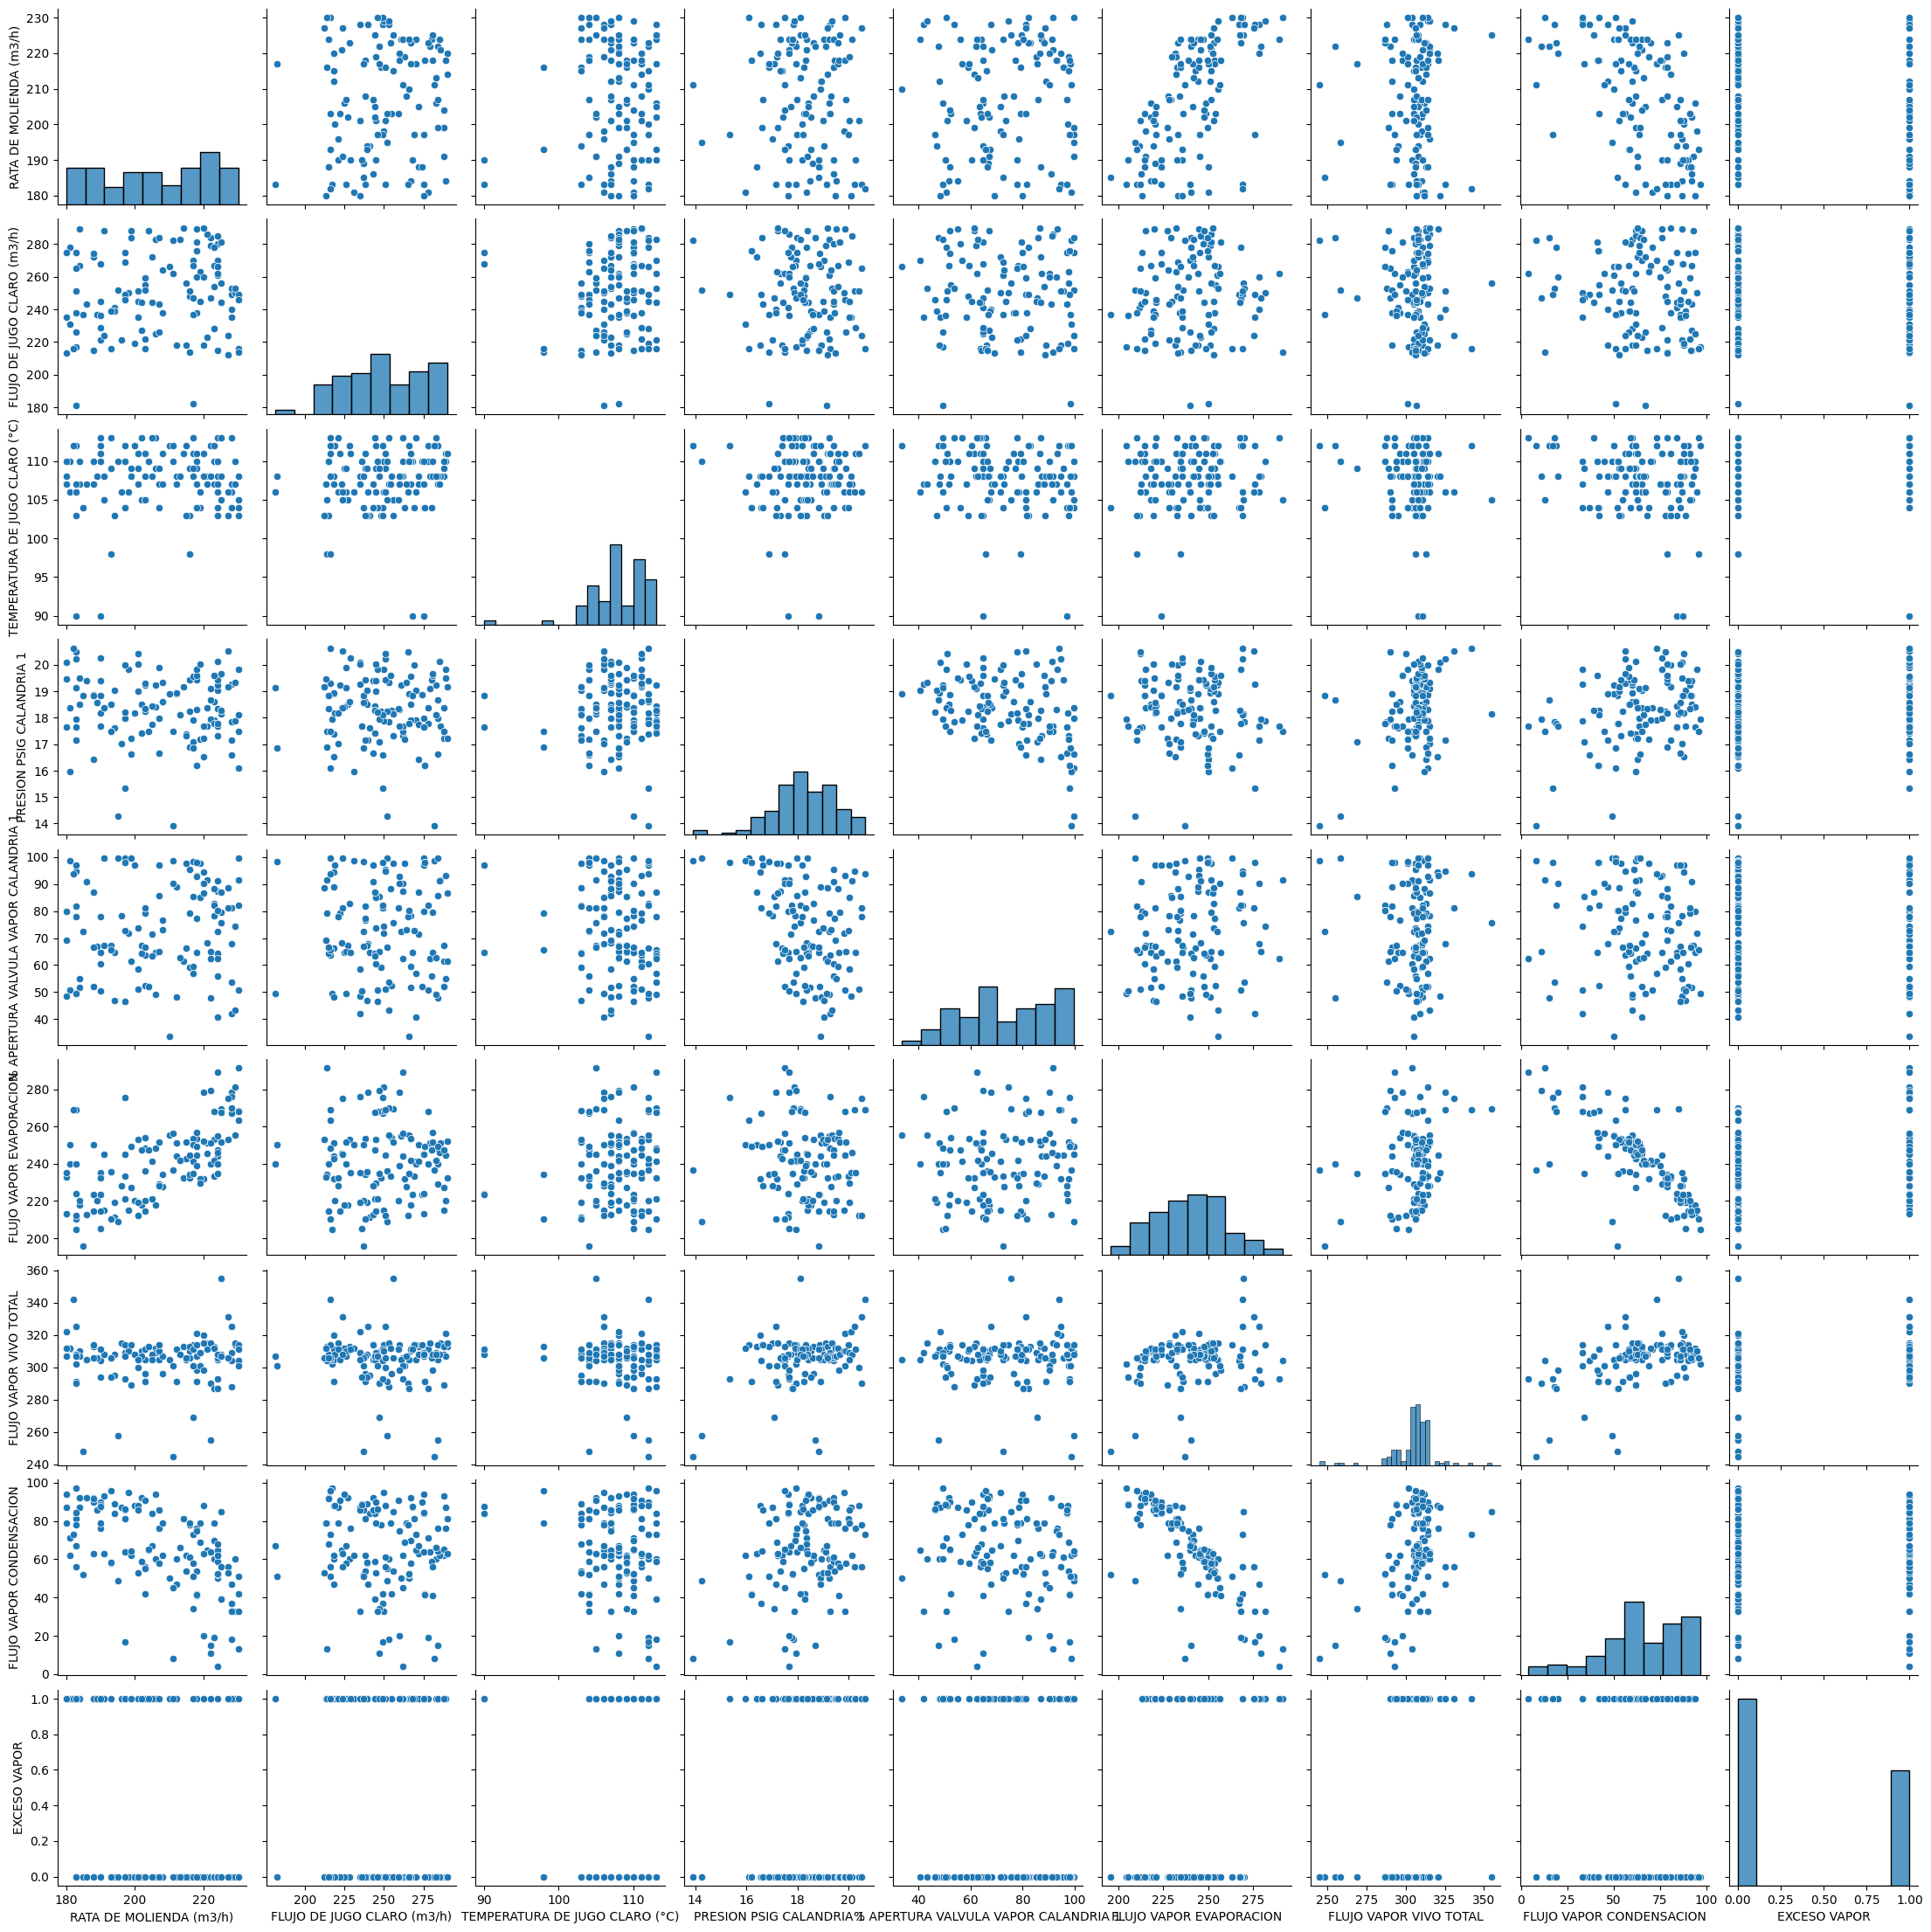

In [ ]:
import seaborn as sns

sns.pairplot(df)


Text(0, 0.5, 'FLUJO VAPOR CONDENSACION')

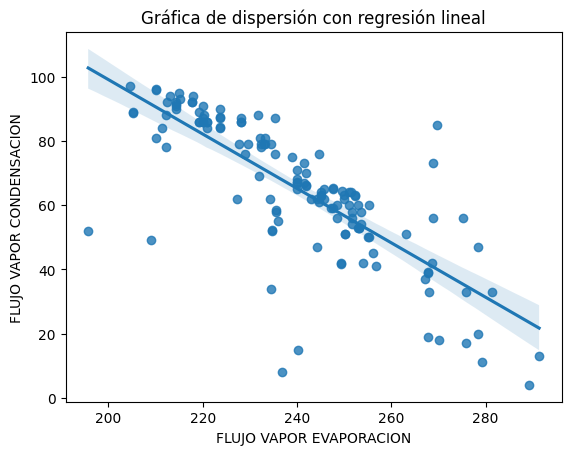

In [ ]:

import seaborn as sns

sns.regplot(x='FLUJO VAPOR EVAPORACION', y='FLUJO VAPOR CONDENSACION', data=df)

#sns.regplot(x='FLUJO VAPOR EVAPORACION', y='FLUJO VAPOR CONDENSACION', data=df, kind='linear', color='blue')
plt.title('Gráfica de dispersión con regresión lineal')
plt.xlabel('FLUJO VAPOR EVAPORACION')
plt.ylabel('FLUJO VAPOR CONDENSACION')


Text(0, 0.5, 'FLUJO VAPOR EVAPORACIO')

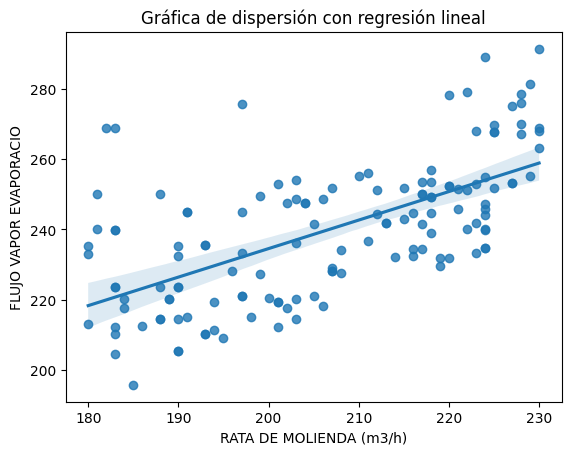

In [ ]:
import seaborn as sns

sns.regplot(x='RATA DE MOLIENDA (m3/h)', y='FLUJO VAPOR EVAPORACION', data=df)

#sns.regplot(x='FLUJO VAPOR EVAPORACION', y='FLUJO VAPOR CONDENSACION', data=df, kind='linear', color='blue')
plt.title('Gráfica de dispersión con regresión lineal')
plt.xlabel('RATA DE MOLIENDA (m3/h)')
plt.ylabel('FLUJO VAPOR EVAPORACIO')

In [ ]:

# Mapa de calor de las correlaciones
sns.heatmap(corr, annot=True, cmap='RdYlGn')

# Visualizar valores nulos
sns.heatmap(df.isnull(), cbar=False)

# Distribución de las variables categóricas
for col in df.select_dtypes(include=['object', 'category']):
    df[col].value_counts().plot.bar()

# Gráficos de dispersión para las variables numéricas
for col1 in df.select_dtypes(include=['number']):
    for col2 in df.select_dtypes(include=['number']):
        if col1 != col2:
            df.plot.scatter(x=col1, y=col2)

# Mostrar los gráficos
plt.show()